### Importing Libraries and Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\BaratSakhizada\Desktop\data analytics\Assignments\Achievement 6\02 Data\Prepared Data'

In [11]:
df_house = pd.read_pickle(os.path.join(path, 'Ex 6.1 house_cleaned.pickle'))

In [15]:
pd.options.display.max_columns=None

In [17]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,apartment_grade,house_view,house_condition,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average_Construction_Design,No_View,Average,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average_Construction_Design,No_View,Average,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average_Construction_Design,No_View,Average,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average_Construction_Design,No_View,Very Good,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,High_Construction_Design,No_View,Average,2015,2


### Removing Categorical Data

In [19]:
house = df_house.drop(columns=['date', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 
                               'zipcode', 'lat', 'long', 'apartment_grade', 'house_view', 'house_condition',
                               'year_sold', 'month_sold'], inplace=False)

In [21]:
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0,1800,7503


In [23]:
house.shape

(21613, 11)

### The Elbow Technique 

In [30]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [52]:
score = [kmeans[i].fit(house).score(house) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
# Manually format the scores without scientific notation

# Manually format the scores without scientific notation
formatted_scores = [f'{s:.2f}' for s in score]

# Print each score on a new line
for s in formatted_scores:
    print(s)

-178831295418837634121728.00
-36093763872963227025408.00
-17743061274983718191104.00
-10028787067451506425856.00
-6523169875528952840192.00
-3919813754559836717056.00
-3172265405192056864768.00
-2524502812484788289536.00
-1772419397202710626304.00


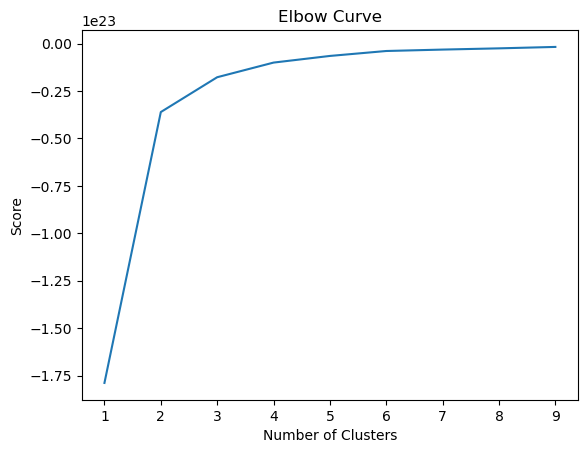

In [54]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### k-means clustering 

In [57]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [59]:
# Fit the k-means object to the data.
kmeans.fit(house)

KMeans(n_clusters=3)

In [61]:
house['clusters'] = kmeans.fit_predict(house)

In [65]:
house.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,clusters
0,7129300520,221900.0000,3,1.0000,1180,5650,1.0000,1180,0,1340,5650,1
1,6414100192,538000.0000,3,2.2500,2570,7242,2.0000,2170,400,1690,7639,1
2,5631500400,180000.0000,2,1.0000,770,10000,1.0000,770,0,2720,8062,0
3,2487200875,604000.0000,4,3.0000,1960,5000,1.0000,1050,910,1360,5000,2
4,1954400510,510000.0000,3,2.0000,1680,8080,1.0000,1680,0,1800,7503,2
5,7237550310,1225000.0000,4,4.5000,5420,101930,1.0000,3890,1530,4760,101930,1
6,1321400060,257500.0000,3,2.2500,1715,6819,2.0000,1715,0,2238,6819,2
7,2008000270,291850.0000,3,1.5000,1060,9711,1.0000,1060,0,1650,9711,2
8,2414600126,229500.0000,3,1.0000,1780,7470,1.0000,1050,730,1780,8113,2
9,3793500160,323000.0000,3,2.5000,1890,6560,2.0000,1890,0,2390,7570,0


In [69]:
house['clusters'].value_counts()

clusters
1    7777
2    7011
0    6825
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

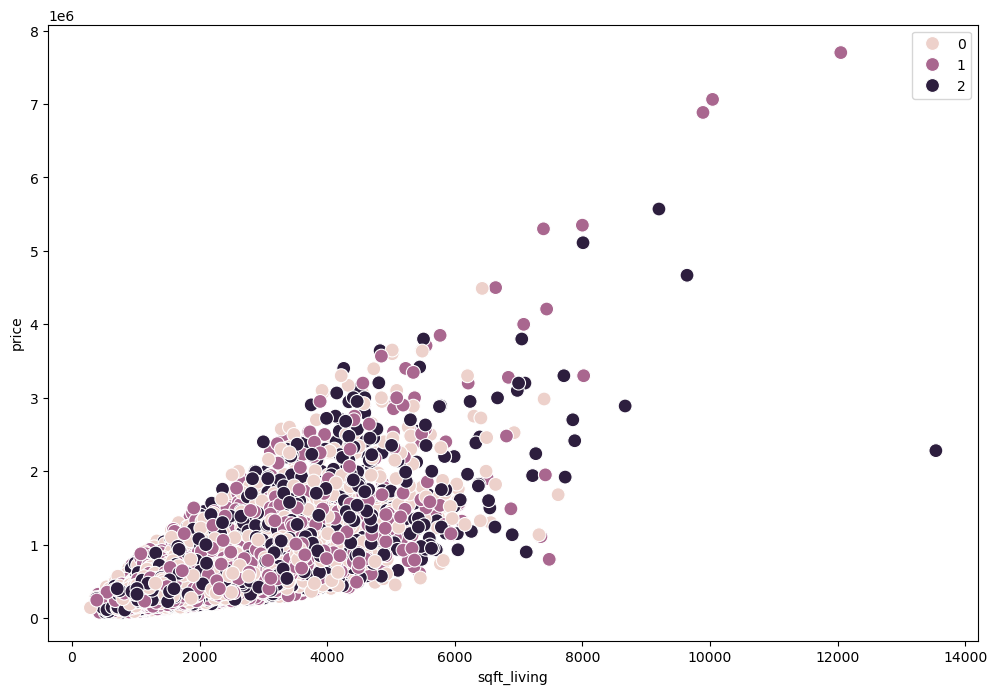

In [73]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=house['sqft_living'], y=house['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sqft_living') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

The clusters overlap significantly. This suggests that the distinction between the clusters is not sharp and clear. Many data points from different clusters are close to each other or even overlapping in many cases. The sqft_living and price data is homogeneous and it doesn't strongly separate into distinct groups. The sqft_living has a clear positive relationship with price, as we expected. However, for any given value of sqft_living, there's still a wide range of prices, showing that other factors likely play a significant role in determining price beyond just size.

In a nutshel, the K-means algorithm tries to assign each data point to a cluster based on proximity to a centroid. Since the data shows a continuous trend (more space, higher prices) rather than distinct groups, K-means struggles to form non-overlapping clusters. This suggests that sqft_living and price alone may not be sufficient features to form well-defined groups.

In [77]:
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,clusters
0,7129300520,221900.0000,3,1.0000,1180,5650,1.0000,1180,0,1340,5650,1
1,6414100192,538000.0000,3,2.2500,2570,7242,2.0000,2170,400,1690,7639,1
2,5631500400,180000.0000,2,1.0000,770,10000,1.0000,770,0,2720,8062,0
3,2487200875,604000.0000,4,3.0000,1960,5000,1.0000,1050,910,1360,5000,2
4,1954400510,510000.0000,3,2.0000,1680,8080,1.0000,1680,0,1800,7503,2


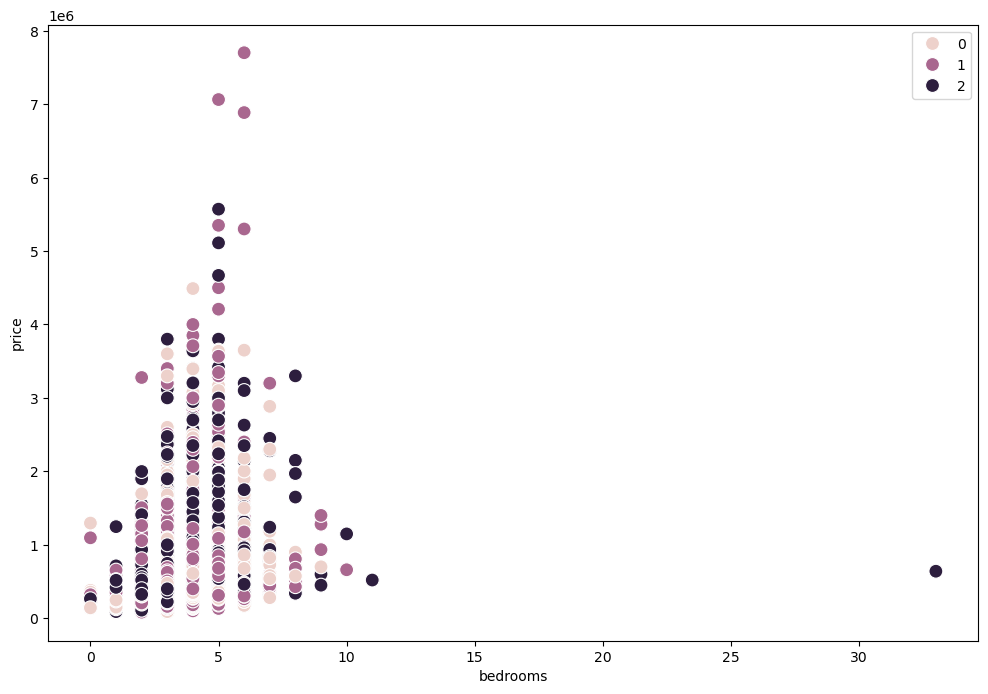

In [79]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=house['bedrooms'], y=house['price'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('bedrooms') 
plt.ylabel('price') 
plt.show()

Similar to sqft_living, bedrooms alone may also not strongly influence the price. While more bedrooms would mean a higher price, other factors like house size (sqft_living), location, condition, view of as house play also significant role. This multifactorial nature of housing prices can make it difficult for K-means to form distinct, non-overlapping clusters.

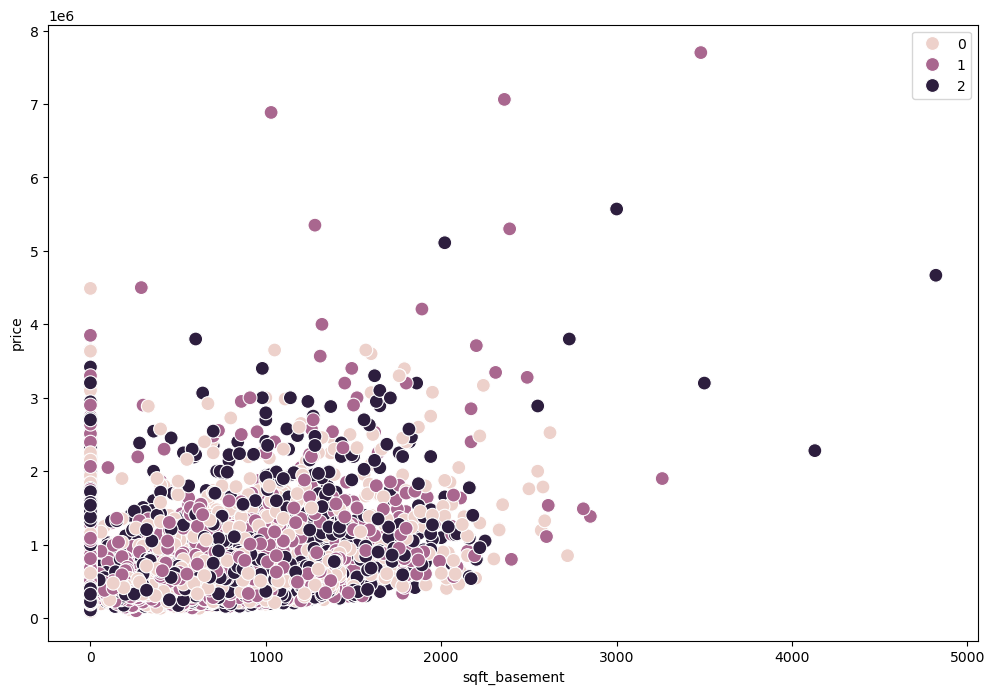

In [85]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=house['sqft_basement'], y=house['price'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('sqft_basement') 
plt.ylabel('price') 
plt.show()

### Descriptive Statistics of Clusters

In [89]:
house.loc[house['clusters'] == 2, 'cluster'] = 'dark purple'
house.loc[house['clusters'] == 1, 'cluster'] = 'purple'
house.loc[house['clusters'] == 0, 'cluster'] = 'pink'

In [91]:
house.groupby('cluster').agg({'sqft_living':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'sqft_basement':['mean', 'median'],
                          'price':['mean', 'median']})

sqft_living           bedrooms        sqft_basement         \
                   mean    median     mean median          mean median   
cluster                                                                  
dark purple   2118.2971 1940.0000   3.3863 3.0000      293.0859 0.0000   
pink          2064.3623 1900.0000   3.3669 3.0000      303.6066 0.0000   
purple        2058.9198 1910.0000   3.3604 3.0000      279.4709 0.0000   

                  price              
                   mean      median  
cluster                              
dark purple 552933.5055 449000.0000  
pink        539545.7553 450000.0000  
purple      528983.9811 455000.0000

While these clusters are distinct numerically, there is still significant overlap in the values between them, especially in terms of price and square footage. The values for the different clusters are quite close (especially for sqft_living and price), meaning that while K-means has tried to create groups, the data points themselves are not significantly different from one another. This means that the data that doesn’t have a clear natural separation. The features we're using to cluster (sqft_living, bedrooms, sqft_basement, and price) may not have enough variability to produce clearly separated clusters. Other features, such as location neighborhood, age of the house, or other amenities, might provide more separation between the clusters.

To improve clustering, we can try adding more features (e.g., location, number of bedrooms, house age) to the dataset. This might help create more meaningful distinctions between clusters. We can also try applying different clustering algorithms because K-means clustering isn’t providing useful results.